In [1]:
import pandas as pd
import plotly
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import timeit
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='once')

### Helper functions

In [2]:
##model fit and cross validation function

def modelfit(estimator,data_train,data_test,predictors,target):
    start = timeit.default_timer()
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    start1 = timeit.default_timer()
    train_pred=estimator.predict(data_train[predictors])
    stop1 = timeit.default_timer()
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=5,scoring='precision')

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy on Train Data: %.4g" % metrics.accuracy_score(data_train.loc[:,target].values, train_pred))
    print ("Precision on Train Data: %.4g" % metrics.precision_score(data_train.loc[:,target].values, train_pred))
    print ("Recall on Train Data: %.4g" % metrics.recall_score(data_train.loc[:,target].values, train_pred))
    print ("F1 score on Train Data: %.4g" % metrics.f1_score(data_train.loc[:,target].values, train_pred))
    
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    start2 = timeit.default_timer()
    test_pred=estimator.predict(data_test[predictors])
    stop2 = timeit.default_timer()
    print ("Accuracy on Test Data: %.4g" % metrics.accuracy_score(data_test.loc[:,target].values, test_pred))  
    print ("Precision on Test Data: %.4g" % metrics.precision_score(data_test.loc[:,target].values, test_pred)) 
    print ("Recall on Test Data: %.4g" % metrics.recall_score(data_test.loc[:,target].values, test_pred)) 
    print ("F1 score on Test Data: %.4g" % metrics.f1_score(data_test.loc[:,target].values, test_pred)) 
    stop = timeit.default_timer()
    print('Total Time: ', stop - start)
    print('training time: ', stop1 - start1)
    print('testing time: ', stop2 - start2)
    return test_pred

In [3]:
## create learning curve ploting function

from sklearn.model_selection import learning_curve
##learning curve
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
def plot_learning_curve(alg, X, y, scoring_metric, algorithm_name):
    sizes, training_scores, testing_scores = learning_curve(alg, X, y, cv=5, scoring= scoring_metric, train_sizes=np.linspace(0.01, 1.0, 30))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)

    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)

    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

    # Drawing plot
    plt.title("LEARNING CURVE FOR %s" % algorithm_name)
    plt.xlabel("Training Set Size"), plt.ylabel("%s Score" % scoring_metric), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return

In [4]:
# create validation curve ploting function


 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
def plot_validation_curve(alg,X, y, param_name, parameter_range, scoring_metric, algorithm_name):
    train_score, test_score = validation_curve(alg, X, y,
                                           param_name = param_name,
                                           param_range = parameter_range,
                                            cv = 5, scoring = scoring_metric)

    # Calculating mean and standard deviation of training score
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with %s" % algorithm_name)
    plt.xlabel("%s" % param_name)
    plt.ylabel("%s" % scoring_metric)
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.show()
    return

## Loading Data 

In [6]:
df = pd.read_csv('../Data/CC_df_sampled.csv')
X_train, X_final_test = train_test_split(df,test_size=0.2, random_state= 2)
X_final_test.to_csv('../Data/testing_dataset.csv', index = False)
## within the training dataset, split the data into training dataset and testing/validation dataset
X_train, X_validation = train_test_split(X_train,test_size=0.2, random_state= 2)

In [7]:
X_all = df.drop(['approved', 'user_id'], axis = 1)
y_all = df['approved']
X = X_train.drop(['approved', 'user_id'], axis = 1)
y = X_train['approved']
X_val = X_validation.drop(['approved', 'user_id'], axis = 1)
y_val = X_validation['approved']
X_final = X_final_test.drop(['approved', 'user_id'], axis = 1)
y_final = X_final_test['approved']

In [8]:
X_val.head()

,education_num,hours_per_week,married,hours,capital_net,inquiry,institution_BRO,institution_PVT,account_type_high_approval,account_type_mid_approval,...,occupation_ Tech-support,occupation_ Transport-moving,asset_code_1.0,asset_code_2.0,asset_code_4.0,asset_code_19.0,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
7257,6.0,40.0,1,1,0.0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3192,9.0,40.0,0,1,0.0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
6018,10.0,70.0,1,1,0.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1412,10.0,20.0,0,0,0.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
9652,10.0,40.0,0,1,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## LDA

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1) ## the result of using 1 PC is already determined in prior step 

In [13]:
lda_X = pd.DataFrame(lda.fit_transform(X, y), columns = ['pc1'])

lda_X.head()

,pc1
0,-1.480946
1,-1.073361
2,-1.893229
3,-0.138971
4,0.150023


In [17]:
lda_X = pd.DataFrame(lda.fit_transform(X, y), columns = ['pc1'])
lda_X['target'] = list(y)
lda_X_validation = pd.DataFrame(lda.fit_transform(X_val,y_val), columns = ['pc1'])
lda_X_validation['target'] = list(y_val)
lda_X_final = pd.DataFrame(lda.fit_transform(X_final,y_final), columns = ['pc1'])
lda_X_final['target'] = list(y_final)

In [18]:
predictors = ['pc1']
target = 'target'

**Baseline model**


In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1)
y_pred=modelfit(mlp, lda_X, lda_X_validation,predictors,target)


Model Report
Accuracy on Train Data: 0.8573
Precision on Train Data: 0.7292
Recall on Train Data: 0.6645
F1 score on Train Data: 0.6954
CV Score : Mean - 0.7288 | Std - 0.009634 | Min - 0.7185 | Max - 0.7439
Accuracy on Test Data: 0.865
Precision on Test Data: 0.7808
Recall on Test Data: 0.6452
F1 score on Test Data: 0.7065
Total Time:  2.702533055999993
training time:  0.006317716999944878
testing time:  0.0027286609999919165


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


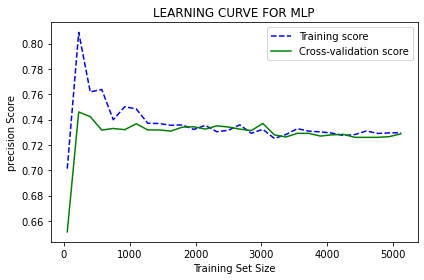

In [20]:
plot_learning_curve(mlp, lda_X[['pc1']], lda_X['target'], 'precision', 'MLP')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.7159319223352476, 0.5506183116611589, 0.443597907417012, 0.38024664155091664, 0.34698416658124254, 0.33070023879823734, 0.3231322401801886, 0.3193278378674183, 0.31767363030973217, 0.3168143151146262, 0.31632635937740344, 0.3160100020480756, 0.3157364149331899, 0.31570482357897844, 0.3155530402615209, 0.31540917281739306, 0.3153353981296791, 0.315497051683657, 0.3152909564226229, 0.3154465916365781, 0.3153388628993781, 0.31517161068010074, 0.3151754815040856, 0.31512258955831557, 0.3151587064193243, 0.31530099694561253, 0.31517921837665386, 0.3151545967602193, 0.31513659026292207, 0.3151253609439701, 0.3152014055392177, 0.31517672444198463, 0.3152248669438414]


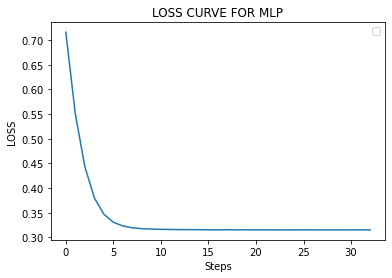

In [21]:
loss_values = mlp.loss_curve_
print (loss_values)
plt.plot(loss_values)
plt.title("LOSS CURVE FOR %s" % 'MLP')
plt.xlabel("Steps"), plt.ylabel('LOSS'), plt.legend(loc="best")
plt.show()

## Hyperparameter tuning

1. validation curve 
2. grid search 

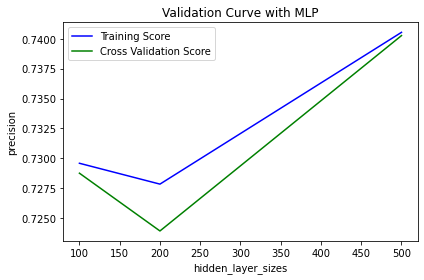

In [22]:
##number of nodes
parameter_range=[(100,),(200,),(500,)]
plot_validation_curve(mlp ,lda_X[['pc1']], lda_X['target'], "hidden_layer_sizes", parameter_range, "precision", 'MLP')

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/Users/ej7793/.local/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"


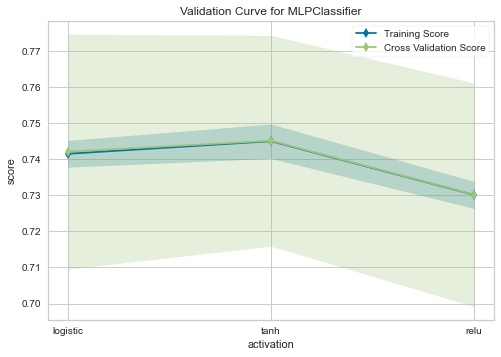

<AxesSubplot:title={'center':'Validation Curve for MLPClassifier'}, xlabel='activation', ylabel='score'>

In [24]:
from yellowbrick.model_selection import ValidationCurve


viz = ValidationCurve(
    mlp, param_name="activation",
    param_range=['logistic', 'tanh', 'relu'], cv=10, scoring="precision"
)
viz.fit(lda_X[['pc1']], lda_X['target'])
viz.show()

In [26]:
param_grid = {
              'hidden_layer_sizes': [(200,100), (500), (100)]}
grid_lr = GridSearchCV(estimator =mlp, param_grid= param_grid, scoring='precision', 
                        refit=True, return_train_score=True) 
grid_lr.fit(lda_X[['pc1']], lda_X['target'])

GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [(200, 100), 500, 100]},
             return_train_score=True, scoring='precision')

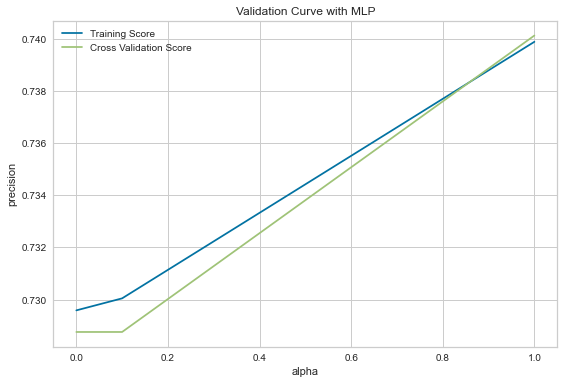

In [28]:
##regularization
## choose alpha = 0.1
parameter_range = [0.0001, 0.1, 1]
plot_validation_curve(mlp, lda_X[['pc1']], lda_X['target'], "alpha", parameter_range, "precision", 'MLP')

Grid search

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'activation': ['tanh', 'relu'],
              'alpha': [0.0001, 0.1],
              'hidden_layer_sizes': [(100,),(500,)],
               'learning_rate_init': [0.001, 0.01]}
grid_lr = GridSearchCV(estimator =mlp, param_grid= param_grid, scoring='precision', 
                        refit=True, return_train_score=True) 
grid_lr.fit(lda_X[['pc1']], lda_X['target'])

GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['tanh', 'relu'], 'alpha': [0.0001, 0.1],
                         'hidden_layer_sizes': [(100,), (500,)],
                         'learning_rate_init': [0.001, 0.01]},
             return_train_score=True, scoring='precision')

In [30]:
mlp_tuned = grid_lr.best_estimator_
print(mlp_tuned.get_params())

{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (500,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [32]:
y_pred=modelfit(mlp_tuned, lda_X, lda_X_validation, predictors,target)


Model Report
Accuracy on Train Data: 0.8536
Precision on Train Data: 0.7623
Recall on Train Data: 0.5848
F1 score on Train Data: 0.6619
CV Score : Mean - 0.749 | Std - 0.01109 | Min - 0.7358 | Max - 0.7632
Accuracy on Test Data: 0.8619
Precision on Test Data: 0.8074
Recall on Test Data: 0.5931
F1 score on Test Data: 0.6838
Total Time:  6.247805404000019
training time:  0.06597414299994853
testing time:  0.015478657999892675


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.42348112602767957, 0.32069151627271336, 0.3171213322307276, 0.31768972121883754, 0.31723187741065445, 0.3173597491118498, 0.31776483561556634, 0.3177228691662382, 0.3176833546797712, 0.31787887672922266, 0.3172449018924179, 0.317250326222187, 0.3170464020529508, 0.3174667496162906]


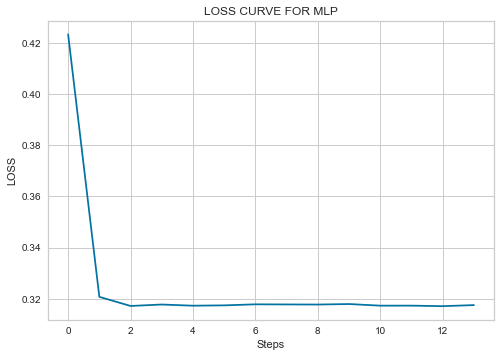

In [33]:
test_acc = metrics.precision_score(y_val, y_pred) * 100.
loss_values = mlp_tuned.loss_curve_
print (loss_values)
plt.plot(loss_values)
plt.title("LOSS CURVE FOR %s" % 'MLP')
plt.xlabel("Steps"), plt.ylabel('LOSS'), plt.legend(loc="best")
plt.show()

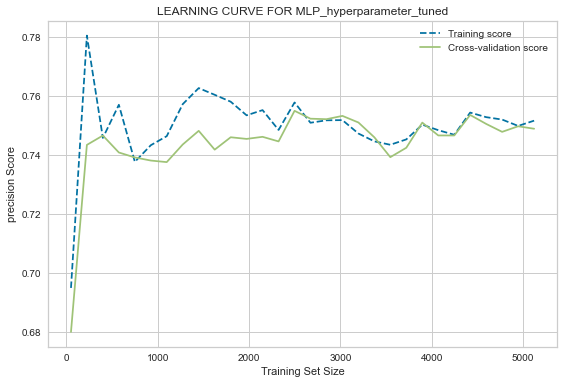

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


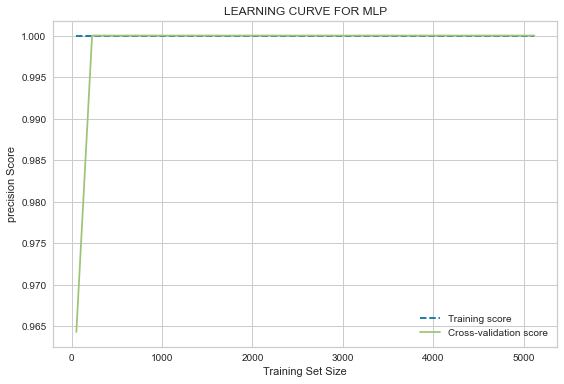

In [34]:
disp = plot_learning_curve(mlp_tuned, lda_X[['pc1']], lda_X['target'], 'precision', 'MLP_hyperparameter_tuned')
plot_learning_curve(mlp, lda_X, y, 'precision', 'MLP');

## Final test dataset prediction evaluation 

In [35]:
y_pred=modelfit(mlp_tuned, lda_X, lda_X_final, predictors,target)


Model Report
Accuracy on Train Data: 0.8536
Precision on Train Data: 0.7623
Recall on Train Data: 0.5848
F1 score on Train Data: 0.6619
CV Score : Mean - 0.749 | Std - 0.01109 | Min - 0.7358 | Max - 0.7632
Accuracy on Test Data: 0.8675
Precision on Test Data: 0.8088
Recall on Test Data: 0.621
F1 score on Test Data: 0.7026
Total Time:  8.74554317600007
training time:  0.09382800399998814
testing time:  0.022300096000094527
